In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [6]:
# 1. dowload dataset
# 2. Load the dataset

data = pd.read_csv("C:\\Users\\VISWA TEJA\\Downloads\\titanic.csv")
data.info

<bound method DataFrame.info of      survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_m

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]), array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
       307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]), <BarContainer object of 10 artists>)


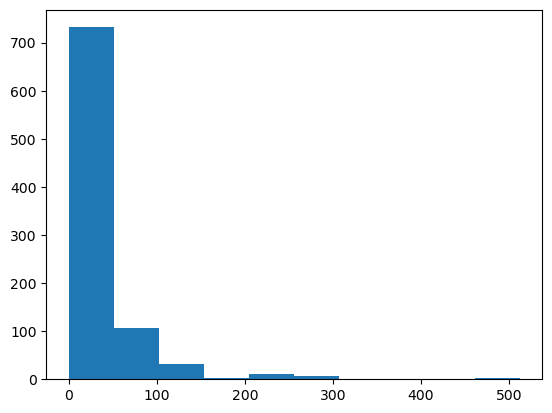

In [10]:
#3
#Univariate Analysis

d = plt.hist(data["fare"]) 
print(d)

{'whiskers': [<matplotlib.lines.Line2D object at 0x00000195BD794160>, <matplotlib.lines.Line2D object at 0x00000195BE12A6E0>], 'caps': [<matplotlib.lines.Line2D object at 0x00000195BC5AAD70>, <matplotlib.lines.Line2D object at 0x00000195BC5AB2B0>], 'boxes': [<matplotlib.lines.Line2D object at 0x00000195BC5AB250>], 'medians': [<matplotlib.lines.Line2D object at 0x00000195BC5AB340>], 'fliers': [<matplotlib.lines.Line2D object at 0x00000195BC5AA980>], 'means': []}


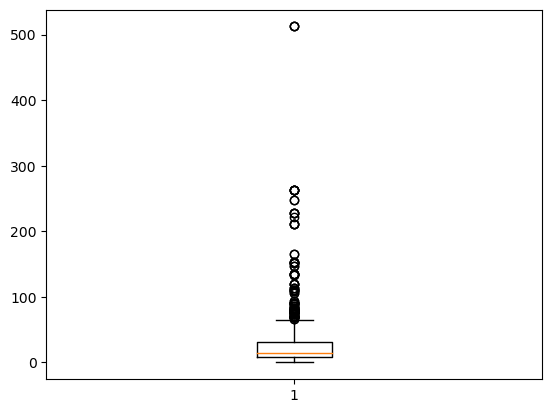

In [11]:

y = plt.boxplot(data['fare'])
print(y)

Text(0, 0.5, 'age')

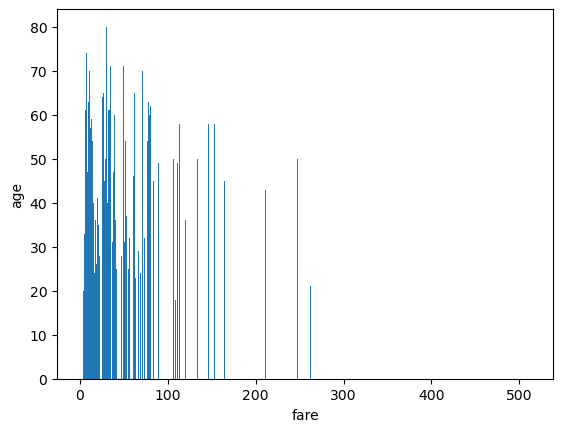

In [14]:
#bi-varient

plt.bar(data["fare"],data["age"])
plt.xlabel("fare")
plt.ylabel("age")

Text(0, 0.5, 'age')

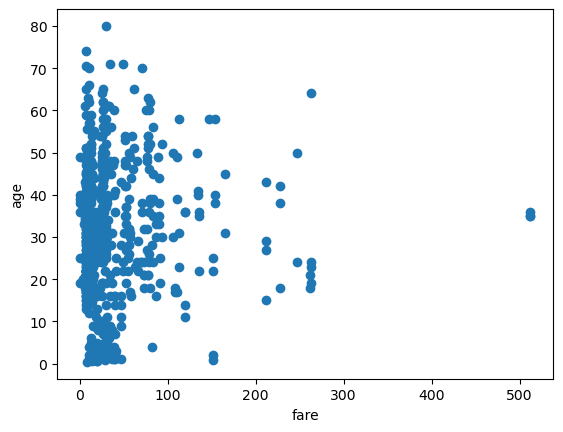

In [15]:
plt.scatter(data["fare"],data["age"])
plt.xlabel("fare")
plt.ylabel("age")

Text(0, 0.5, 'age')

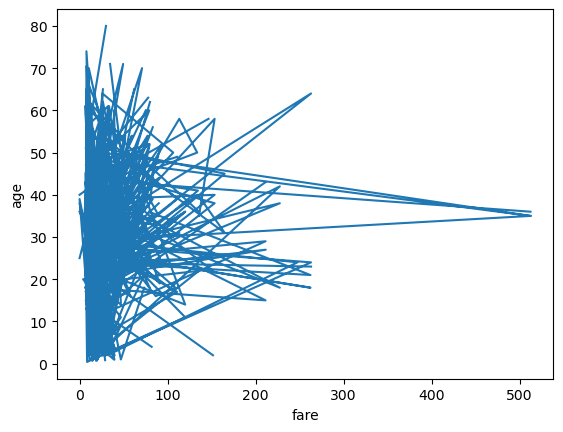

In [16]:
plt.plot(data["fare"],data["age"])
plt.xlabel("fare")
plt.ylabel("age")

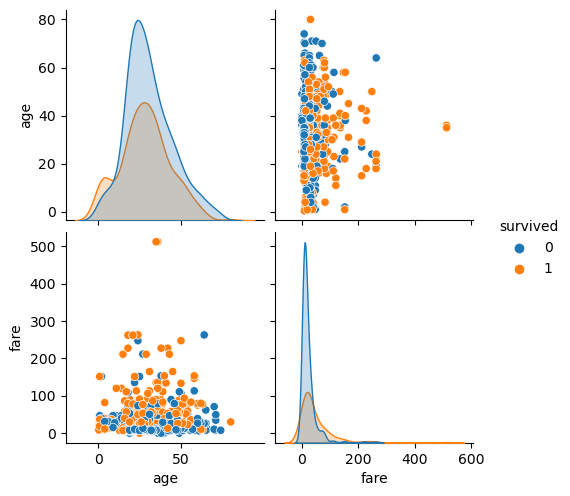

In [17]:
#mulit-varient

sns.pairplot(data=data, vars=['age', 'fare'], hue='survived')
plt.show()


In [18]:
#4.

#Perform descriptive statistics on the dataset

statistics = data.describe()
print(statistics)


         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


In [46]:
#5.

#Handle the Missing values.

# Check for missing values in each column
missing_values = data.isnull().sum()

# Handle missing values
data['age'].fillna(data['age'].mean(), inplace=True)
data['fare'].fillna(data['fare'].median(), inplace=True)
data['embarked'].fillna(data['embarked'].mode()[0], inplace=True)
data['deck'].fillna('Unknown', inplace=True)
# Repeat the above line for other columns with missing values as needed



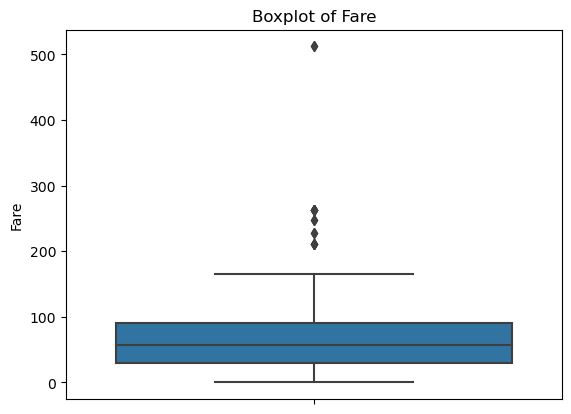

In [22]:
#6

#Find outliers and replace them:

#Boxplot of Fare
sns.boxplot(data=data, y='fare')
plt.ylabel('Fare')
plt.title('Boxplot of Fare')
plt.show()

# Replace outliers using the Interquartile Range (IQR) method
Q1 = data['fare'].quantile(0.25)
Q3 = data['fare'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data['fare'] = np.where((data['fare'] < lower_bound) | (data['fare'] > upper_bound), data['fare'].median(), data['fare'])

    

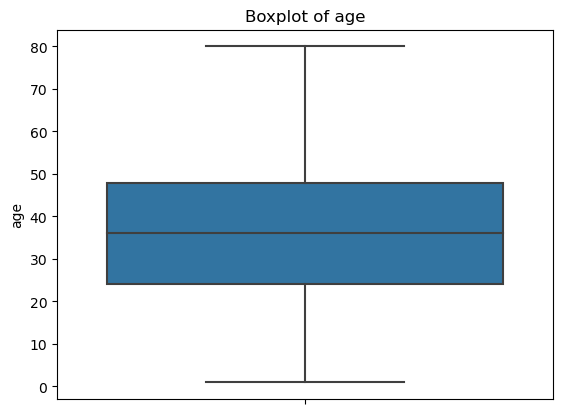

In [23]:
sns.boxplot(data=data, y='age')
plt.ylabel('age')
plt.title('Boxplot of age')
plt.show()

# Replace outliers using the Interquartile Range (IQR) method
Q1 = data['age'].quantile(0.25)
Q3 = data['age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data['age'] = np.where((data['age'] < lower_bound) | (data['age'] > upper_bound), data['age'].median(), data['age'])


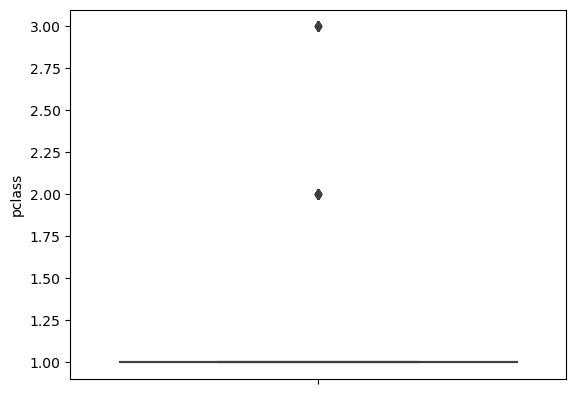

In [25]:
sns.boxplot(data=data, y='pclass')
plt.ylabel('pclass')
plt.show()

# Replace outliers using the Interquartile Range (IQR) method
Q1 = data['pclass'].quantile(0.25)
Q3 = data['pclass'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data['pclass'] = np.where((data['pclass'] < lower_bound) | (data['pclass'] > upper_bound), 
                            data['pclass'].median(), data['pclass'])

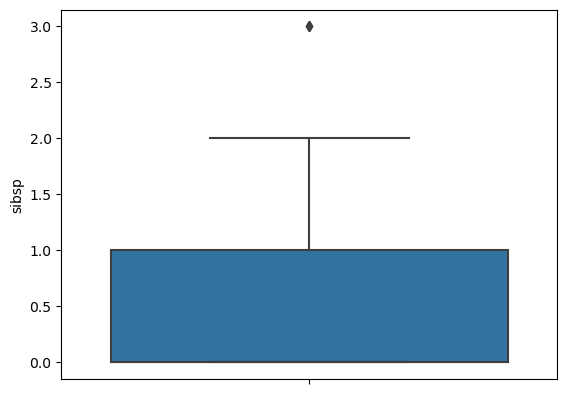

In [26]:
sns.boxplot(data=data, y='sibsp')
plt.ylabel('sibsp')
plt.show()

# Replace outliers using the Interquartile Range (IQR) method
Q1 = data['sibsp'].quantile(0.25)
Q3 = data['sibsp'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data['sibsp'] = np.where((data['sibsp'] < lower_bound) | (data['sibsp'] > upper_bound), 
                            data['sibsp'].median(), data['sibsp'])

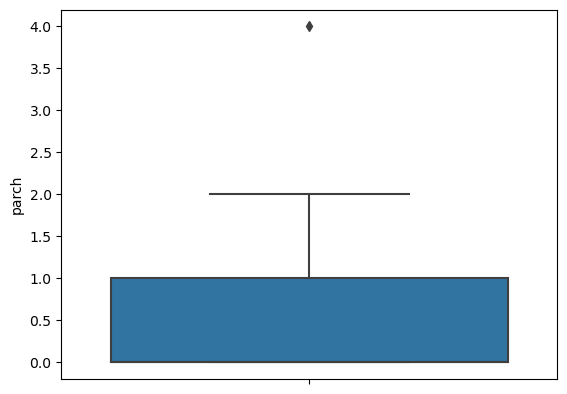

In [27]:
sns.boxplot(data=data, y='parch')
plt.ylabel('parch')
plt.show()

# Replace outliers using the Interquartile Range (IQR) method
Q1 = data['parch'].quantile(0.25)
Q3 = data['parch'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data['parch'] = np.where((data['parch'] < lower_bound) | (data['parch'] > upper_bound), 
                            data['parch'].median(), data['parch'])

In [29]:
#7

#Check for categorical columns and perform encoding:

print(data['sex'].unique())

# Perform one-hot encoding
data_encoded = pd.get_dummies(data, columns=['sex', 'embarked', 'class', 'who', 'deck', 'embark_town', 'alone'], drop_first=True)


['female' 'male']


In [30]:

print(data['class'].unique())

# Perform one-hot encoding
data_encoded = pd.get_dummies(data, columns=['sex', 'embarked', 'class', 'who', 'deck', 'embark_town', 'alone'], drop_first=True)


['First' 'Third' 'Second']


In [31]:
print(data['who'].unique())

# Perform one-hot encoding
data_encoded = pd.get_dummies(data, columns=['sex', 'embarked', 'class', 'who', 'deck', 'embark_town', 'alone'], drop_first=True)


['woman' 'man' 'child']


In [32]:
print(data['adult_male'].unique())

# Perform one-hot encoding
data_encoded = pd.get_dummies(data, columns=['sex', 'embarked', 'class', 'who', 'deck', 'embark_town', 'alone'], drop_first=True)


[False  True]


In [33]:
print(data['deck'].unique())

# Perform one-hot encoding
data_encoded = pd.get_dummies(data, columns=['sex', 'embarked', 'class', 'who', 'deck', 'embark_town', 'alone'], drop_first=True)


['C' 'E' 'G' 'D' 'A' 'B' 'F']


In [34]:
print(data['embark_town'].unique())

# Perform one-hot encoding
data_encoded = pd.get_dummies(data, columns=['sex', 'embarked', 'class', 'who', 'deck', 'embark_town', 'alone'], drop_first=True)


['Cherbourg' 'Southampton' 'Queenstown']


In [38]:
print(data['alive'].unique())

# Perform one-hot encoding
data_encoded = pd.get_dummies(data, columns=['sex', 'embarked', 'class', 'who', 'deck', 'embark_town', 'alone'], drop_first=True)


['yes' 'no']


In [36]:
print(data['alone'].unique())

# Perform one-hot encoding
data_encoded = pd.get_dummies(data, columns=['sex', 'embarked', 'class', 'who', 'deck', 'embark_town', 'alone'], drop_first=True)


[False  True]


In [40]:
# Identify categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()
print(categorical_columns)

# Perform one-hot encoding for categorical columns
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)
print(data_encoded)

['sex', 'embarked', 'class', 'who', 'deck', 'embark_town', 'alive']
     survived  pclass   age  sibsp  parch     fare  adult_male  alone  \
1        38.0     1.0  38.0    1.0    0.0  71.2833       False  False   
3        35.0     1.0  35.0    1.0    0.0  53.1000       False  False   
6        54.0     1.0  54.0    0.0    0.0  51.8625        True   True   
10        4.0     1.0   4.0    1.0    1.0  16.7000       False  False   
11       58.0     1.0  58.0    0.0    0.0  26.5500       False   True   
..        ...     ...   ...    ...    ...      ...         ...    ...   
871      47.0     1.0  47.0    1.0    1.0  52.5542       False  False   
872      33.0     1.0  33.0    0.0    0.0   5.0000        True   True   
879      56.0     1.0  56.0    0.0    1.0  83.1583       False  False   
887      19.0     1.0  19.0    0.0    0.0  30.0000       False   True   
889      26.0     1.0  26.0    0.0    0.0  30.0000        True   True   

     sex_male  embarked_Q  ...  who_woman  deck_B  deck

In [41]:
#8

#Split the data into dependent and independent variables:

X = data_encoded.drop('survived', axis=1)  # Independent variables
y = data_encoded['survived']  # Dependent variable


In [43]:
#9

# Scale independent variables


X = data.iloc[:, 1:]
numeric_columns = X.select_dtypes(include=np.number).columns.tolist()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[numeric_columns])
X_scaled = pd.DataFrame(X_scaled, columns=numeric_columns)
X_encoded = pd.concat([X_scaled, X.select_dtypes(exclude=np.number)], axis=1)
print(X_encoded)


     pclass       age     sibsp     parch      fare     sex embarked  class  \
0       0.0  0.152082  1.047504 -0.644418  0.333954     NaN      NaN    NaN   
1       0.0 -0.039875  1.047504 -0.644418 -0.167703  female        C  First   
2       0.0  1.175852 -0.751041 -0.644418 -0.201844     NaN      NaN    NaN   
3       0.0 -2.023430  1.047504  0.768644 -1.171937  female        S  First   
4       0.0  1.431795 -0.751041 -0.644418 -0.900187     NaN      NaN    NaN   
..      ...       ...       ...       ...       ...     ...      ...    ...   
871     NaN       NaN       NaN       NaN       NaN  female        S  First   
872     NaN       NaN       NaN       NaN       NaN    male        S  First   
879     NaN       NaN       NaN       NaN       NaN  female        C  First   
887     NaN       NaN       NaN       NaN       NaN  female        S  First   
889     NaN       NaN       NaN       NaN       NaN    male        C  First   

       who adult_male deck  embark_town alive  alon

In [44]:
#10

# Split the data into training and testing:

X = data_encoded.drop('survived', axis=1)
y = data_encoded['survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)